<a href="https://colab.research.google.com/github/harshilj0310/Data-Science-Notebooks/blob/main/Transfer_Leraning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")


TensorFlow Version: 2.18.0
Keras Version: 3.8.0


In [ ]:
model_sequential = keras.Sequential([
layers.Input(shape=(784,)), # Defines the input shape
layers.Dense(128, activation='relu', name='layer1'),
layers.Dense(10, activation='softmax', name='output_layer')
])
model_sequential.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Simulated data loading function
def load_simple_defect_data():
# This is a placeholder. In a real scenario, load actual image data.
  num_samples = 1000
  img_size = 64
  num_classes = 3
  # Simulate grayscale images
  x_train = np.random.rand(num_samples, img_size, img_size, 1).astype('float32')
  y_train = keras.utils.to_categorical(np.random.randint(0, num_classes, num_samples), num_classes)
  x_test = np.random.rand(num_samples // 5, img_size, img_size, 1).astype('float32')
  y_test = keras.utils.to_categorical(np.random.randint(0, num_classes, num_samples // 5), num_classes)
  return (x_train, y_train), (x_test, y_test)

(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = load_simple_defect_data()
input_shape_cnn = x_train_cnn.shape[1:] # (64, 64, 1)
num_classes_cnn = y_train_cnn.shape[1]  # 3

print(f"x_train shape: {x_train_cnn.shape}")
print(f"y_train shape: {y_train_cnn.shape}")
print(f"Input shape for CNN: {input_shape_cnn}")
print(f"Number of classes: {num_classes_cnn}")

x_train shape: (1000, 64, 64, 1)
y_train shape: (1000, 3)
Input shape for CNN: (64, 64, 1)
Number of classes: 3


In [ ]:
cnn_model = keras.Sequential(
    [
        layers.Input(shape=input_shape_cnn, name="input_layer"), # Explicit Input layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="conv1"), # 32 filters, 3x3 kernel
        layers.MaxPooling2D(pool_size=(2, 2), name="pool1"), # 2x2 pooling
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name="conv2"), # 64 filters
        layers.MaxPooling2D(pool_size=(2, 2), name="pool2"),
        layers.Flatten(name="flatten"), # Flatten the 2D feature maps to 1D
        layers.Dropout(0.5, name="dropout1"), # Dropout for regularization
        layers.Dense(num_classes_cnn, activation="softmax", name="output_softmax")
# Output layer
    ],
    name="DefectShapeCNN"
)
cnn_model.summary()

Model: "DefectShapeCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 3)              │        37,635 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,451 (220.51 KB)

 Trainable params: 56,451 (220.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])
print("Training the simple CNN model...")
# Using a small number of epochs for demonstration
history_cnn = cnn_model.fit(x_train_cnn, y_train_cnn, batch_size=32, epochs=10,
validation_split=0.1, verbose=1)
print("Simple CNN model training complete.")
# Evaluate the model
print("\nEvaluating simple CNN model:")
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"Test Loss: {loss_cnn:.4f}")
print(f"Test Accuracy: {accuracy_cnn:.4f}")

Training the simple CNN model...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.3072 - loss: 1.1349 - val_accuracy: 0.4300 - val_loss: 1.0909
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3571 - loss: 1.0966 - val_accuracy: 0.3900 - val_loss: 1.0911
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.3792 - loss: 1.0921 - val_accuracy: 0.3900 - val_loss: 1.1014
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3619 - loss: 1.0971 - val_accuracy: 0.3600 - val_loss: 1.0774
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3480 - loss: 1.0952 - val_accuracy: 0.3300 - val_loss: 1.1033
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3964 - loss: 1.0916 - val_accuracy: 0.3700 - val_loss: 1.0991
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4690 - loss: 1.0781 - val_accuracy: 0.2300 - val_loss: 1.1938
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.3497 - loss

3.1.2.2

In [ ]:
try:
    import keras_tuner as kt
except ImportError:
    print("Keras Tuner not found. Installing...")
    !pip install -q keras-tuner
    import keras_tuner as kt
print("Keras Tuner imported successfully.")

Keras Tuner not found. Installing...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00
Keras Tuner imported successfully.


In [ ]:
def build_cnn_for_tuner(hp):
    model = keras.Sequential(name="TunableDefectCNN")
    model.add(layers.Input(shape=input_shape_cnn, name="input_layer_tuner")) # Use the globally defined input_shape_cnn

    # Tune the number of filters for the first Conv2D layer
    model.add(layers.Conv2D(filters=hp.Int('conv1_filters', min_value=16,
max_value=64, step=16),
                              kernel_size=(3,3), activation='relu', name="conv1_tuner"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), name="pool1_tuner"))
 # Tune the number of filters for the second Conv2D layer
    model.add(layers.Conv2D(filters=hp.Int('conv2_filters', min_value=32,
max_value=128, step=32),
                              kernel_size=(3,3), activation='relu', name="conv2_tuner"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), name="pool2_tuner"))

    model.add(layers.Flatten(name="flatten_tuner"))

    # Tune the number of units in the Dense layer
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256,
step=64),
                             activation='relu', name="dense_tuner"))

    # Tune the dropout rate
    model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2,
max_value=0.5, step=0.1), name="dropout_tuner"))

    model.add(layers.Dense(num_classes_cnn, activation='softmax',
name="output_tuner")) # Use globally defined num_classes_cnn

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(
  build_cnn_for_tuner,
  objective='val_accuracy', # Goal is to maximize validation accuracy
  max_trials=5,
  # Total number of hyperparameter combinations to test (low for demo)
  executions_per_trial=1,   # Number of models to train per combination
  directory='keras_tuner_dir_cnn', # Separate directory for this tuner
  project_name='defect_cnn_hyper_tuning',
  overwrite=True # Overwrite previous logs if any
)
# Prepare a smaller subset for faster tuning demonstration if the dataset is large
# For this example with random data, full data is fine.
# x_train_tune, y_train_tune = x_train_cnn[:len(x_train_cnn)//2],
y_train_cnn[:len(y_train_cnn)//2]
# x_val_tune, y_val_tune = x_test_cnn[:len(x_test_cnn)//2],
y_test_cnn[:len(y_test_cnn)//2]
print("Starting hyperparameter search for CNN...")
# Using a small number of epochs for each trial for demonstration
tuner.search(x_train_cnn, y_train_cnn, epochs=5, validation_data=(x_test_cnn,
y_test_cnn),
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)])
# Stop early if no improvement
print("Hyperparameter search for CNN complete.")
# Get the optimal hyperparameters
best_hps_cnn = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.3400000035762787

Best val_accuracy So Far: 0.3499999940395355
Total elapsed time: 00h 01m 31s
Hyperparameter search for CNN complete.


In [ ]:
# Print the optimal hyperparameters
print(f"""
The optimal number of filters in the first conv layer is {best_hps_cnn.get('conv1_filters')}.
The optimal number of filters in the second conv layer is {best_hps_cnn.get('conv2_filters')}.
The optimal number of units in the dense layer is {best_hps_cnn.get('dense_units')}.
The optimal dropout rate is {best_hps_cnn.get('dropout_rate')}.
The optimal learning rate for the optimizer is {best_hps_cnn.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters
tuned_cnn_model = tuner.hypermodel.build(best_hps_cnn)

# Retrain the model with the best HPs on the full data for more epochs
print("\nRetraining the tuned CNN model with best hyperparameters...")
history_tuned_cnn = tuned_cnn_model.fit(
    x_train_cnn,
    y_train_cnn,
    epochs=15,  # More epochs
    validation_data=(x_test_cnn, y_test_cnn),
    verbose=1
)
print("Tuned CNN model retraining complete.")

# Evaluate the tuned model
print("\nEvaluating tuned CNN model:")
loss_tuned_cnn, accuracy_tuned_cnn = tuned_cnn_model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"Tuned Model Test Loss: {loss_tuned_cnn:.4f}")
print(f"Tuned Model Test Accuracy: {accuracy_tuned_cnn:.4f}")



The optimal number of filters in the first conv layer is 64.
The optimal number of filters in the second conv layer is 32.
The optimal number of units in the dense layer is 192.
The optimal dropout rate is 0.4.
The optimal learning rate for the optimizer is 0.0001.


Retraining the tuned CNN model with best hyperparameters...
Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.3437 - loss: 1.1103 - val_accuracy: 0.3400 - val_loss: 1.1071
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.3492 - loss: 1.0977 - val_accuracy: 0.3400 - val_loss: 1.1050
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.3720 - loss: 1.0993 - val_accuracy: 0.2950 - val_loss: 1.1006
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.3594 - loss: 1.0936 - val_accuracy: 0.3400 - val_loss: 1.1046
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3794 - loss: 1.0930 - val_accuracy: 0.2900 - val_loss: 1.1046
Epoch 6/15
32/32 ━━━━━━━━━━━━━━

3.1.2.3

In [ ]:
# Sample text data and labels
texts = ["Keras is awesome and fun",
         "I love building deep learning models with it",
         "This is not good at all",
         "What a terrible user experience I had",
         "The product works perfectly",
         "I am very disappointed with the service"]
labels_text = np.array([1, 1, 0, 0, 1, 0]) # 1 for positive, 0 for negative

# Parameters for tokenization and padding
vocab_size_text = 200  # Consider top 200 words in the vocabulary
max_length_text = 15   # Max length of sequences after padding
embedding_dim_text = 32 # Dimension of the embedding vector

# Tokenize the text (Convert words to integers)
# Using TextVectorization layer for a more modern approach
text_vectorizer = layers.TextVectorization(max_tokens=vocab_size_text,
                                           output_sequence_length=max_length_text)
text_vectorizer.adapt(texts) # Adapt to the text data to build vocabulary

# Vectorize the text data
vectorized_texts = text_vectorizer(texts)

print(f"Vocabulary size: {text_vectorizer.vocabulary_size()}")
print("Vectorized texts shape:", vectorized_texts.shape)
print("Sample vectorized text:", vectorized_texts[0].numpy())
print("Corresponding label:", labels_text[0])

Vocabulary size: 34
Vectorized texts shape: (6, 15)
Sample vectorized text: [19  5 28 30 23  0  0  0  0  0  0  0  0  0  0]
Corresponding label: 1


In [ ]:
lstm_model_text = keras.Sequential([
    layers.Input(shape=(max_length_text,), dtype="int64", name="input_text"), # Input for vectorized text
    layers.Embedding(input_dim=text_vectorizer.vocabulary_size(),
                     output_dim=embedding_dim_text,
                     mask_zero=True, # Important for padded sequences
                     name="embedding_text"),
    # The output of Embedding is (batch_size, max_length, embedding_dim)
    layers.LSTM(64, name="lstm_layer_text"), # 64 LSTM units
    # The output of LSTM (by default, return_sequences=False) is (batch_size, units)
    layers.Dense(64, activation='relu', name="dense_intermediate"),
    layers.Dropout(0.5, name="dropout_text"),
    layers.Dense(1, activation='sigmoid', name="output_sigmoid_text") # Binary classification
], name="SentimentLSTM_Text")

lstm_model_text.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
lstm_model_text.summary()

Model: "SentimentLSTM_Text"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_text (Embedding)      │ (None, 15, 32)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer_text (LSTM)          │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_intermediate (Dense)      │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_text (Dropout)          │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_sigmoid_text (Dense)     │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,145 (117.75 KB)

 Trainable params: 30,145 (117.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining LSTM model for text classification...")

# Using vectorized_texts and labels_text
history_lstm_text_clf = lstm_model_text.fit(
    vectorized_texts,
    labels_text,
    epochs=30,
    verbose=1,
    validation_split=0.2
)

print(f"LSTM Final Training Accuracy: {history_lstm_text_clf.history['accuracy'][-1]:.4f}")
if 'val_accuracy' in history_lstm_text_clf.history:
    print(f"LSTM Final Validation Accuracy: {history_lstm_text_clf.history['val_accuracy'][-1]:.4f}")

# For GRU, replace layers.LSTM(64) with layers.GRU(64)
gru_model_text = keras.Sequential([
    layers.Input(shape=(max_length_text,), dtype="int64", name="input_text_gru"),
    layers.Embedding(
        input_dim=text_vectorizer.vocabulary_size(),
        output_dim=embedding_dim_text,
        mask_zero=True,
        name="embedding_gru"
    ),
    layers.GRU(64, name="gru_layer_text"),
    layers.Dense(64, activation='relu', name="dense_intermediate_gru"),
    layers.Dropout(0.5, name="dropout_gru"),
    layers.Dense(1, activation='sigmoid', name="output_sigmoid_gru")
], name="SentimentGRU_Text")

gru_model_text.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nTraining GRU model for text classification...")
history_gru_text_clf = gru_model_text.fit(
    vectorized_texts,
    labels_text,
    epochs=30,
    verbose=1,
    validation_split=0.2
)

print(f"GRU Final Training Accuracy: {history_gru_text_clf.history['accuracy'][-1]:.4f}")
if 'val_accuracy' in history_gru_text_clf.history:
    print(f"GRU Final Validation Accuracy: {history_gru_text_clf.history['val_accuracy'][-1]:.4f}")



Training LSTM model for text classification...
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 0.6945 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - loss: 0.6915 - val_accuracy: 0.0000e+00 - val_loss: 0.6942
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.6889 - val_accuracy: 0.0000e+00 - val_loss: 0.6939
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.6872 - val_accuracy: 0.0000e+00 - val_loss: 0.6937
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7500 - loss: 0.6905 - val_accuracy: 0.0000e+00 - val_loss: 0.6938
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.6894 - val_accuracy: 0.0000e+00 - val_loss: 0.6940
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.6829 - val_accuracy: 0.0000e+00 - val_loss: 0.6944
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

3.1.2.4

In [ ]:
corpus_nwp = [
    "Keras is a high-level API for neural networks",
    "It is used for building and training deep learning models",
    "Models can be complex or simple depending on the task",
    "Keras integrates seamlessly with TensorFlow backend"
]

# Tokenizer for next-word prediction
tokenizer_nwp = keras.preprocessing.text.Tokenizer(oov_token="<unk>")  # Handle unknown words
tokenizer_nwp.fit_on_texts(corpus_nwp)

total_words_nwp = len(tokenizer_nwp.word_index) + 1  # Add 1 for padding token 0
print(f"Total unique words in NWP corpus: {total_words_nwp - 1}")  # -1 to exclude padding

# Generate input sequences
input_sequences_nwp = []
for line in corpus_nwp:
    token_list = tokenizer_nwp.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences_nwp.append(n_gram_sequence)

# Pad sequences
max_sequence_len_nwp = max([len(x) for x in input_sequences_nwp])
sequences_padded_nwp = keras.preprocessing.sequence.pad_sequences(
    input_sequences_nwp,
    maxlen=max_sequence_len_nwp,
    padding='pre'
)

# Create predictors (xs) and labels (ys)
xs_nwp, ys_nwp_raw = sequences_padded_nwp[:, :-1], sequences_padded_nwp[:, -1]

# One-hot encode the labels (target words)
ys_nwp_categorical = keras.utils.to_categorical(ys_nwp_raw, num_classes=total_words_nwp)

# Print info
print(f"Total words (including padding): {total_words_nwp}")
print(f"Max sequence length for model input: {max_sequence_len_nwp - 1}")
print(f"Shape of xs_nwp: {xs_nwp.shape}")
print(f"Shape of ys_nwp_categorical: {ys_nwp_categorical.shape}")
print("Sample X_nwp:", xs_nwp[0])
print("Sample Y_nwp (raw index):", ys_nwp_raw[0])
print("Sample Y_nwp (categorical):", ys_nwp_categorical[0])


Total unique words in NWP corpus: 32
Total words (including padding): 33
Max sequence length for model input: 9
Shape of xs_nwp: (31, 9)
Shape of ys_nwp_categorical: (31, 33)
Sample X_nwp: [0 0 0 0 0 0 0 0 2]
Sample Y_nwp (raw index): 3
Sample Y_nwp (categorical): [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
embedding_dim_nwp_model = 100  # Dimension for word embeddings
lstm_units_nwp = 150           # Number of units in the LSTM layer

nwp_model = keras.Sequential([
    layers.Input(shape=(max_sequence_len_nwp - 1,), name="input_nwp"),  # Input length is max_len - 1
    layers.Embedding(input_dim=total_words_nwp, output_dim=embedding_dim_nwp_model, name="embedding_nwp"),
    layers.LSTM(units=lstm_units_nwp, name="lstm_nwp"),
    layers.Dropout(rate=0.2, name="dropout_nwp"),
    layers.Dense(units=total_words_nwp, activation='softmax', name="output_nwp")  # Output layer with units = total_words
], name="NextWordPredictor")

nwp_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

nwp_model.summary()


Model: "NextWordPredictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_nwp (Embedding)       │ (None, 9, 100)         │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_nwp (LSTM)                 │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_nwp (Dropout)           │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_nwp (Dense)              │ (None, 33)             │         4,983 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,883 (620.64 KB)

 Trainable params: 158,883 (620.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nTraining Next-Word Prediction model...")
# Due to the small dataset, it will overfit quickly, but this demonstrates the process.
history_nwp = nwp_model.fit(xs_nwp, ys_nwp_categorical, epochs=200, verbose=1)
print("Next-Word Prediction model training complete.")
print(f"NWP Final Training Accuracy: {history_nwp.history['accuracy'][-1]:.4f}")


Training Next-Word Prediction model...
Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.4933
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0968 - loss: 3.4049
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0968 - loss: 3.2790
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2581 - loss: 3.2179
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2903 - loss: 3.1026
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3548 - loss: 2.7849
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2903 - loss: 2.4289
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3226 - loss: 2.0651
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5161 - loss: 1.7724
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3871 - loss: 1.6345
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5484 - loss: 1.4039
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━

In [ ]:
def generate_next_word(seed_text, num_next_words, model, tokenizer, max_sequence_len):
    current_text = seed_text
    print(f"Seed: '{current_text}'")

    for _ in range(num_next_words):
        token_list = tokenizer.texts_to_sequences([current_text])[0]
        token_list_padded = keras.preprocessing.sequence.pad_sequences(
            [token_list], maxlen=max_sequence_len - 1, padding='pre'
        )

        predicted_probs = model.predict(token_list_padded, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break

        if not output_word:
            break

        current_text += " " + output_word

    print(f"Generated: '{current_text}'")
    return current_text


# Generate predictions using the model
print("\nGenerating text with NWP model:")
generate_next_word("Keras is used for", 3, nwp_model, tokenizer_nwp, max_sequence_len_nwp)
generate_next_word("Models can be", 2, nwp_model, tokenizer_nwp, max_sequence_len_nwp)



Generating text with NWP model:
Seed: 'Keras is used for'
Generated: 'Keras is used for building and training'
Seed: 'Models can be'
Generated: 'Models can be complex or'


'Models can be complex or'

3.2.1.1

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras

# For MobileNetV2, input images are expected to be 224x224x3.
# Our toy defect data (x_train_cnn) is 64x64x1.
# We need to resize and convert to 3 channels.
IMG_SIZE_MOBILE = 224  # MobileNetV2 default input size

# Resize and convert grayscale to RGB
def preprocess_for_mobilenet(images_gray, target_size):
    images_resized = tf.image.resize(images_gray, (target_size, target_size))
    if images_resized.shape[-1] == 1:  # If grayscale
        images_rgb = tf.image.grayscale_to_rgb(images_resized)
    else:  # If already RGB (e.g. for CIFAR-10)
        images_rgb = images_resized
    # Apply MobileNetV2-specific preprocessing
    return keras.applications.mobilenet_v2.preprocess_input(images_rgb)

# Preprocess training and test data
x_train_mobilenet_ready = preprocess_for_mobilenet(x_train_cnn, IMG_SIZE_MOBILE)
x_test_mobilenet_ready = preprocess_for_mobilenet(x_test_cnn, IMG_SIZE_MOBILE)

print(f"Shape of x_train_mobilenet_ready: {x_train_mobilenet_ready.shape}")  # Should be (None, 224, 224, 3)
print(f"Shape of y_train_cnn (labels): {y_train_cnn.shape}")  # Labels remain the same

# Load pre-trained MobileNetV2 model without top classification layer
base_model_mobilenet = MobileNetV2(
    input_shape=(IMG_SIZE_MOBILE, IMG_SIZE_MOBILE, 3),
    include_top=False,  # Do not include the ImageNet classifier
    weights='imagenet'  # Load weights pre-trained on ImageNet
)

# Freeze the base model (its weights will not be updated during training)
base_model_mobilenet.trainable = False

print("\nMobileNetV2 base model summary (trainable=False):")
base_model_mobilenet.summary(show_trainable=True)


Shape of x_train_mobilenet_ready: (1000, 224, 224, 3)
Shape of y_train_cnn (labels): (1000, 3)

MobileNetV2 base model summary (trainable=False):


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1     │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1 (Conv2D)    │ (None, 112,     │       864 │ input_layer_1… │   N   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bn_Conv1          │ (None, 112,     │       128 │ Conv1[0][0]    │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1_relu (ReLU) │ (None, 112,     │         0 │ bn_Conv1[0][0] │   -   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       288 │ Conv1_relu[0]… │   N   │
│ (DepthwiseConv2D) │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       128 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │         0 │ expanded_conv… │   -   │
│ (ReLU)            │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │       512 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │        64 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand    │ (None, 112,     │     1,536 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_BN │ (None, 112,     │       384 │ block_1_expan… │   N   │
│ (BatchNormalizat… │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_r… │ (None, 112,     │         0 │ block_1_expan… │   -   │
│ (ReLU)            │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_pad       │ (None, 113,     │         0 │ block_1_expan… │   -   │
│ (ZeroPadding2D)   │ 113, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwise │ (None, 56, 56,  │       864 │ block_1_pad[0… │   N   │
│ (DepthwiseConv2D) │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │       384 │ block_1_depth… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │         0 │ block_1_depth… │   -   │
│ (ReLU)            │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_project   │ (None, 56, 56,  │     2,304 │ block_1_depth… │   N 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras import layers

# Get the output of the base model
x_feat = base_model_mobilenet.output
x_feat = layers.GlobalAveragePooling2D(name="gap_transfer")(x_feat)  # Global average pooling

x_feat = layers.Dense(128, activation='relu', name="dense_transfer_1")(x_feat)  # New trainable dense layer
x_feat = layers.Dropout(0.5, name="dropout_transfer")(x_feat)
outputs_transfer = layers.Dense(num_classes_cnn, activation='softmax', name="output_transfer")(x_feat)  # Output layer

# Create the new model
feature_extractor_model = Model(
    inputs=base_model_mobilenet.input,
    outputs=outputs_transfer,
    name="MobileNetV2_FeatureExtractor"
)

feature_extractor_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nSummary of the feature extraction model:")
feature_extractor_model.summary()



Summary of the feature extraction model:


Model: "MobileNetV2_FeatureExtractor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
print("\nTraining the classifier head using MobileNetV2 features...")

history_feature_extraction = feature_extractor_model.fit(
    x_train_mobilenet_ready,
    y_train_cnn,
    epochs=10,  # Fewer epochs often sufficient for the head
    batch_size=32,
    validation_data=(x_test_mobilenet_ready, y_test_cnn),
    verbose=1
)

print("Classifier head training complete.")
print(f"Feature Extractor Final Val Accuracy: {history_feature_extraction.history['val_accuracy'][-1]:.4f}")



Training the classifier head using MobileNetV2 features...
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 876ms/step - accuracy: 0.3517 - loss: 1.2300 - val_accuracy: 0.3600 - val_loss: 1.0979
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 810ms/step - accuracy: 0.3177 - loss: 1.1056 - val_accuracy: 0.3400 - val_loss: 1.0980
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 842ms/step - accuracy: 0.3699 - loss: 1.0979 - val_accuracy: 0.3400 - val_loss: 1.0990
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 870ms/step - accuracy: 0.3341 - loss: 1.0984 - val_accuracy: 0.3400 - val_loss: 1.0992
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 826ms/step - accuracy: 0.3488 - loss: 1.0980 - val_accuracy: 0.3400 - val_loss: 1.0995
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 835ms/step - accuracy: 0.3411 - loss: 1.0976 - val_accuracy: 0.3400 - val_loss: 1.1000
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 834ms/step - accuracy: 0.3598 - loss: 1.0974 - val_accuracy: 0.3400 - val_loss: 1.1000
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━

3.2.1.2

In [ ]:
# Unfreeze the base model to allow fine-tuning
base_model_mobilenet.trainable = True

# Let's fine-tune from this layer onwards.
# A common strategy is to unfreeze the top N layers or blocks.
# For MobileNetV2, which has 154 layers in this version, let's unfreeze from layer 100.
fine_tune_at_layer_index = 100

# Freeze all the layers before the `fine_tune_at_layer_index`
for layer in base_model_mobilenet.layers[:fine_tune_at_layer_index]:
    layer.trainable = False

print(f"\nNumber of layers in base_model_mobilenet: {len(base_model_mobilenet.layers)}")

# Count trainable layers now
num_trainable_layers_fine_tune = sum([1 for layer in base_model_mobilenet.layers if layer.trainable])
print(f"Number of trainable layers in base_model_mobilenet after unfreezing for fine tuning: {num_trainable_layers_fine_tune}")

# Re-compile the model with a very low learning rate for fine-tuning
feature_extractor_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Much lower LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nRe-compiled model for fine-tuning. Summary:")
feature_extractor_model.summary(show_trainable=True)



Number of layers in base_model_mobilenet: 154
Number of trainable layers in base_model_mobilenet after unfreezing for fine tuning: 54

Re-compiled model for fine-tuning. Summary:


Model: "MobileNetV2_FeatureExtractor"

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)      ┃ Output Shape    ┃   Param # ┃ Connected to   ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer       │ (None, 224,     │         0 │ -              │   -   │
│ (InputLayer)      │ 224, 3)         │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1 (Conv2D)    │ (None, 112,     │       864 │ input_layer[0… │   N   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ bn_Conv1          │ (None, 112,     │       128 │ Conv1[0][0]    │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ Conv1_relu (ReLU) │ (None, 112,     │         0 │ bn_Conv1[0][0] │   -   │
│                   │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       288 │ Conv1_relu[0]… │   N   │
│ (DepthwiseConv2D) │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │       128 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_de… │ (None, 112,     │         0 │ expanded_conv… │   -   │
│ (ReLU)            │ 112, 32)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │       512 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ expanded_conv_pr… │ (None, 112,     │        64 │ expanded_conv… │   N   │
│ (BatchNormalizat… │ 112, 16)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand    │ (None, 112,     │     1,536 │ expanded_conv… │   N   │
│ (Conv2D)          │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_BN │ (None, 112,     │       384 │ block_1_expan… │   N   │
│ (BatchNormalizat… │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_expand_r… │ (None, 112,     │         0 │ block_1_expan… │   -   │
│ (ReLU)            │ 112, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_pad       │ (None, 113,     │         0 │ block_1_expan… │   -   │
│ (ZeroPadding2D)   │ 113, 96)        │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwise │ (None, 56, 56,  │       864 │ block_1_pad[0… │   N   │
│ (DepthwiseConv2D) │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │       384 │ block_1_depth… │   N   │
│ (BatchNormalizat… │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_depthwis… │ (None, 56, 56,  │         0 │ block_1_depth… │   -   │
│ (ReLU)            │ 96)             │           │                │       │
├───────────────────┼─────────────────┼───────────┼────────────────┼───────┤
│ block_1_project   │ (None, 56, 56,  │     2,304 │ block_1_depth… │   N 

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 2,025,795 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [ ]:
epochs_for_fine_tuning = 10  # Number of epochs for fine-tuning
initial_epoch_for_fine_tuning = history_feature_extraction.epoch[-1] + 1  # Continue from previous training

print(f"\nStarting fine-tuning from epoch {initial_epoch_for_fine_tuning}...")

history_fine_tuning = feature_extractor_model.fit(
    x_train_mobilenet_ready,
    y_train_cnn,
    epochs=initial_epoch_for_fine_tuning + epochs_for_fine_tuning,
    initial_epoch=initial_epoch_for_fine_tuning,
    batch_size=32,
    validation_data=(x_test_mobilenet_ready, y_test_cnn),
    verbose=1
)

print("Fine-tuning complete.")
print(f"Fine-Tuning Final Val Accuracy: {history_fine_tuning.history['val_accuracy'][-1]:.4f}")



Starting fine-tuning from epoch 10...
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3514 - loss: 1.1306 - val_accuracy: 0.3400 - val_loss: 1.1004
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3825 - loss: 1.0901 - val_accuracy: 0.3400 - val_loss: 1.0996
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4581 - loss: 1.0712 - val_accuracy: 0.3450 - val_loss: 1.0988
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.4555 - loss: 1.0579 - val_accuracy: 0.3250 - val_loss: 1.0984
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4829 - loss: 1.0307 - val_accuracy: 0.3600 - val_loss: 1.0986
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.4973 - loss: 1.0149 - val_accuracy: 0.3600 - val_loss: 1.0995
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5351 - loss: 0.9853 - val_accuracy: 0.3600 - val_loss: 1.0991
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5412 - 

3.3.1.1

In [ ]:
# Get predictions from the fine-tuned model
y_pred_probs_finetuned = feature_extractor_model.predict(x_test_mobilenet_ready)
y_pred_classes_finetuned = np.argmax(y_pred_probs_finetuned, axis=1) # Convert probabilities to class labels
# True labels (y_test_cnn is one-hot, convert to class indices)
y_true_classes_finetuned = np.argmax(y_test_cnn, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Fine-tuned MobileNetV2:
               precision    recall  f1-score   support

DefectType 0       0.00      0.00      0.00        68
DefectType 1       0.36      1.00      0.53        72
DefectType 2       0.00      0.00      0.00        60

    accuracy                           0.36       200
   macro avg       0.12      0.33      0.18       200
weighted avg       0.13      0.36      0.19       200



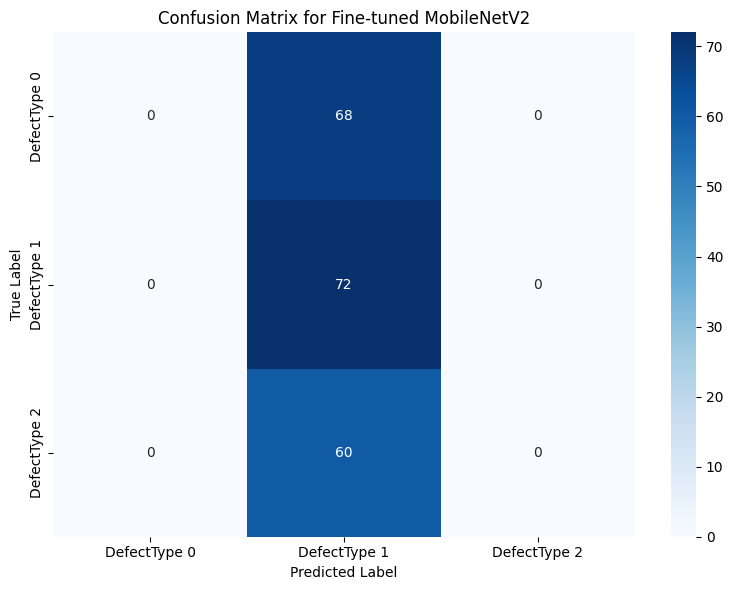

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure target_names match the number of classes
defect_class_names = [f'DefectType {i}' for i in range(num_classes_cnn)]

# Generate confusion matrix and classification report
cm_finetuned = confusion_matrix(y_true_classes_finetuned, y_pred_classes_finetuned)
report_finetuned = classification_report(
    y_true_classes_finetuned,
    y_pred_classes_finetuned,
    target_names=defect_class_names
)

print("Classification Report for Fine-tuned MobileNetV2:\n", report_finetuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_finetuned,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=defect_class_names,
    yticklabels=defect_class_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fine-tuned MobileNetV2')
plt.tight_layout()
plt.show()


3.3.1.2

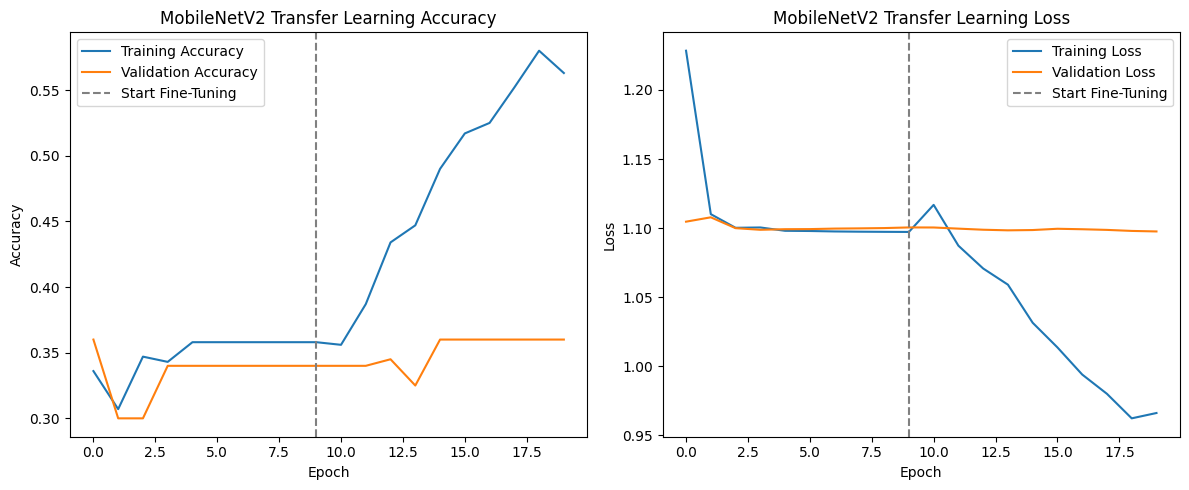

In [ ]:
def plot_combined_training_history(history_initial, history_secondary, initial_epochs,
                                   model_name="Model"):
    acc = history_initial.history['accuracy'] + history_secondary.history['accuracy']
    val_acc = history_initial.history['val_accuracy'] + history_secondary.history['val_accuracy']

    loss = history_initial.history['loss'] + history_secondary.history['loss']
    val_loss = history_initial.history['val_loss'] + history_secondary.history['val_loss']

    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.axvline(x=initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.axvline(x=initial_epochs - 1, color='gray', linestyle='--', label='Start Fine-Tuning')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Number of epochs for the initial feature extraction phase
initial_training_epochs = len(history_feature_extraction.epoch)

# Call the plot function
plot_combined_training_history(
    history_feature_extraction,
    history_fine_tuning,
    initial_training_epochs,
    model_name="MobileNetV2 Transfer Learning"
)
